In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
from IPython.display import display
import sklearn
from sklearn.metrics.pairwise import nan_euclidean_distances
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df_train=pd.read_csv('/content/drive/MyDrive/titanic/train.csv')

In [17]:
missing_vals = df_train.isnull().sum()/len(df_train)
missing_vals.sort_values(ascending=False)
missing_vals = pd.DataFrame(missing_vals,columns=['missing_rate'])
print(missing_vals)

             missing_rate
PassengerId      0.000000
Survived         0.000000
Pclass           0.000000
Name             0.000000
Sex              0.000000
Age              0.198653
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.000000
Cabin            0.771044
Embarked         0.002245


In [21]:
missing_index=df_train.isnull()
display(df_train[missing_index.values==True])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


29.69911764705882
14.526497332334044


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


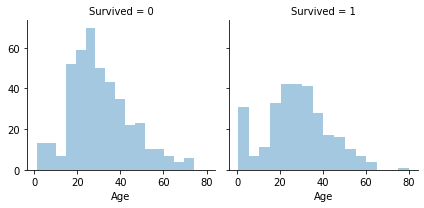

In [23]:
print(df_train['Age'].mean())
print(df_train['Age'].std())
g=sns.FacetGrid(df_train,col='Survived')
g.map(sns.distplot,'Age',kde=False)

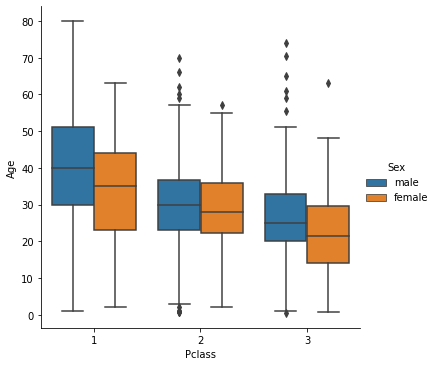

In [24]:
g=sns.catplot(x='Pclass',y='Age',hue='Sex',data=df_train,kind='box')

In [28]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df_train['Pclass']=le.fit_transform(df_train['Pclass'])
df_train['Sex']=le.fit_transform(df_train['Sex'])
data=df_train[['Sex','Age','Pclass']]
values_neighbors=1
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=values_neighbors)
df_filled=pd.DataFrame(imputer.fit_transform(data))
display(data[missing_index.values==True])
display(df_filled[missing_index.values==True])

,Sex,Age,Pclass
0,1,22.0,2
2,0,26.0,2
4,1,35.0,2
5,1,NaN,2
5,1,NaN,2
...,...,...,...
885,0,39.0,2
886,1,27.0,1
888,0,NaN,2
888,0,NaN,2


,0,1,2
0,1.0,22.0,2.0
2,0.0,26.0,2.0
4,1.0,35.0,2.0
5,1.0,22.0,2.0
5,1.0,22.0,2.0
...,...,...,...
885,0.0,39.0,2.0
886,1.0,27.0,1.0
888,0.0,26.0,2.0
888,0.0,26.0,2.0
